# Exercise 11.1

Determine by operating counting the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$. (This is a reasoning exercise - you do not need to write a program.)

### 1. Dot product between two vectors
Definition: The sum of the products of the corresponding entries of the two vectors.

Complexity: Requires multiplying each item in matched vector lengths $n$, and then computing $n$ addition steps. This brings the total to $2n$ steps, although we are uninterested in the constant $2$ and report the complexity as $O(n)$ for all cases.

### 2. Matrix-vector product
Definition: The sum of the product of entries across each row of matrix $A$ with the entries of the column vector $v$. If $A$ is defined as an $n$ x $m$ matrix and $v$ is defined as a vector of length $m$, the product will be a vector of length $n$.

Complexity: $n$ x $m$ (times a constant of little interest). For a square matrix $A$, the complexity will be $n^2$.

### 3. Matrix-matrix product
Definition: The sum of the product of entries across each row of matrix $A$ with the entries across each column of matrix $B$. If $A$ is defined as an $n$ x $m$ matrix and $B$ is defined as an $m$ x $p$ matrix, the resulting matrix $AB$ will be of size $n$ x $p$.

Complexity: $n$ x $m$ x $p$ (times a constant of little interest). For matched square matrices $A$ and $B$, the complexity will be $n^3$.

## Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

In [1]:
# Import modules for calculations and plotting
import numpy as np
import matplotlib.pyplot as plt

# Configure notebook for inline plotting
%matplotlib inline

### 1. Dot product between two vectors

In [2]:
# Define function to take the dot product between two vectors
def my_dot_product(v1, v2):
    """ Take the dot product between two vectors v1 and v2 """
    # Check that vectors are of same length
    if len(v1) != len(v2):
        raise ValueError("Vectors must be of equal lengths.")
    
    # Initialize sum
    sum = 0
    
    # Multiply each pair of values and add to sum
    for a, b in zip(v1, v2):
        sum += (a * b)
        
    # Return total
    return sum

In [3]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 14)
 
# Create two arrays of random numbers, and make read-only  
x1 = np.random.rand(N[-1])
x1.flags.writeable = False

x2 = np.random.rand(N[-1])
x2.flags.writeable = False


# # Time the different implementations
my_times = []
np_times = []
for n in N:
    # Time our quicksort implememtation
    t = %timeit -n3 -q -o my_dot_product(x1[:n], x2[:n])
    my_times.append(t.best)

    t = %timeit -n3 -q -o np.dot(x1[:n], x2[:n])
    np_times.append(t.best)

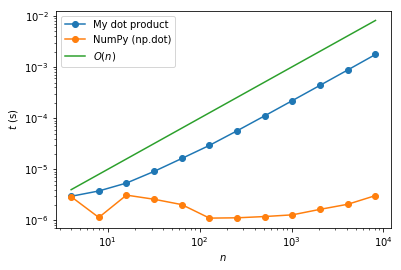

In [4]:
# Plot time taken for vector dot product of our implementation
plt.loglog(N, my_times, marker='o', label='My dot product')

# Plot time taken for built-in dot product
plt.loglog(N, np_times, marker='o', label='NumPy (np.dot)')

# Show reference line of O(n)
plt.loglog(N, 1e-6*N, label=r'$O(n)$')

# Show legend
plt.legend(loc=0);

# Add label and legend
plt.xlabel('$n$');
plt.ylabel('$t$ (s)');

### 2. Matrix-vector product

In [5]:
# Define function to multiply a matrix by a vector
def my_matrix_vector_product(A, v):
    """ Multiply matrix A by vector v """
    # Check for compatible matrix and vector sizes
    if len(A) != len(v):
        raise ValueError("Matrix A must have same number of rows as vector v has elements.")
    
    # Initialize new vector
    result = []
    
    # Multiply each row of matrix A with vector v (use dot product function)
    for row in A:
        result.append(my_dot_product(row, v))
    
    # Return result
    return result

In [6]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 12)
 
# Create a matrix and vector of random numbers, and make read-only  
A = np.random.rand(N[-1], N[-1])
A.flags.writeable = False

v = np.random.rand(N[-1])
v.flags.writeable = False


# # Time the different implementations
my_times = []
np_times = []
for n in N:
    # Time our quicksort implememtation
    t = %timeit -n3 -q -o my_matrix_vector_product(A[:n, :n], v[:n])
    my_times.append(t.best)

    t = %timeit -n3 -q -o np.dot(A[:n, :n], v[:n])
    np_times.append(t.best)

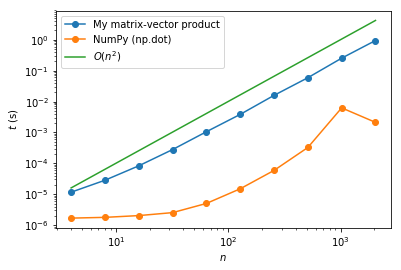

In [7]:
# Plot time taken for matrix-vector multiplication of our implementation
plt.loglog(N, my_times, marker='o', label='My matrix-vector product')

# Plot time taken for built-in dot product
plt.loglog(N, np_times, marker='o', label='NumPy (np.dot)')

# Show reference line of O(n^2)
plt.loglog(N, 1e-6*N*N, label=r'$O(n^2)$')

# Show legend
plt.legend(loc=0);

# Add label and legend
plt.xlabel('$n$');
plt.ylabel('$t$ (s)');

### 3. Matrix-matrix product

In [8]:
# Define function to multiply two matrices
def my_matrix_multiplication(A, B):
    """ Multiply matrix A by matrix B """
    # Check for compatible matrix sizes
    if len(A) != len(B):
        raise ValueError("Matrix A must have same number of rows as matrix B.")
    if len(A[0]) != len(B[0]):
        raise ValueError("Matrix A must have same number of columns as matrix B.")
    
    # Initialize new matrix AB
    AB = []
    
    # Multiply each row of matrix A with each column of matrix B (transform B for easy access to columns)
    for row in A:
        new_row = []
        for column in B.T:
            new_row.append(my_dot_product(row, column))
        AB.append(new_row)
    
    # Return resulting matrix AB
    return AB

In [9]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 7)
 
# Create a matrix and vector of random numbers, and make read-only  
A = np.random.rand(N[-1], N[-1])
A.flags.writeable = False

B = np.random.rand(N[-1], N[-1])
B.flags.writeable = False


# # Time the different implementations
my_times = []
np_times = []
for n in N:
    # Time our quicksort implememtation
    t = %timeit -n3 -q -o my_matrix_multiplication(A[:n, :n], B[:n, :n])
    my_times.append(t.best)

    t = %timeit -n3 -q -o np.dot(A[:n, :n], B[:n, :n])
    np_times.append(t.best)

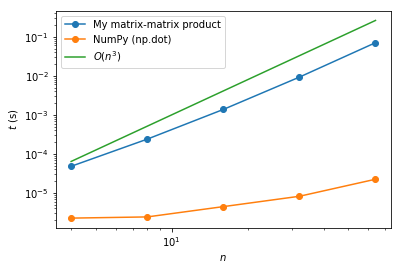

In [10]:
# Plot time taken for matrix-matrix multiplication of our implementation
plt.loglog(N, my_times, marker='o', label='My matrix-matrix product')

# Plot time taken for built-in dot product
plt.loglog(N, np_times, marker='o', label='NumPy (np.dot)')

# Show reference line of O(n^3)
plt.loglog(N, 1e-6*N*N*N, label=r'$O(n^3)$')

# Show legend
plt.legend(loc=0);

# Add label and legend
plt.xlabel('$n$');
plt.ylabel('$t$ (s)');